In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from matplotlib.patches import Circle

from scipy import ndimage
import scipy.stats as stats
from scipy.signal import medfilt
%matplotlib inline

In [19]:
img=ndimage.imread('/Volumes/DataDisk/P20171822/04_evaluation/NEUTRA/big_ball/bigball_0800.tif').astype('double')

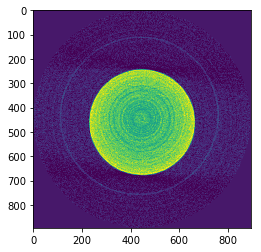

In [20]:
plt.imshow(img)

In [51]:
def cog(img) :
    
    dims=img.shape
    th=filters.threshold_otsu(img)
    biimg=th<img
    sum0=biimg.sum(axis=0)
    pos0=np.arange(0,len(sum0))
    cogx=(sum0*pos0).sum()/sum0.sum()

    sum1=biimg.sum(axis=1)
    pos1=np.arange(0,len(sum1))
    cogy=(sum1*pos1).sum()/sum1.sum()
    return (cogx, cogy)

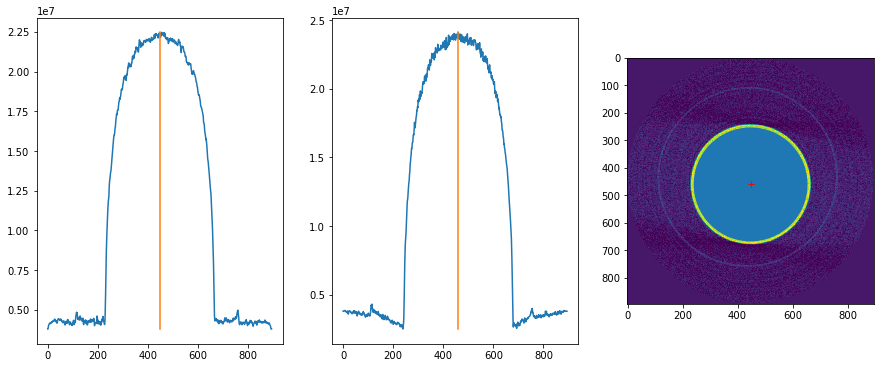

In [53]:
(cogx,cogy)=cog(img)
plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
plt.plot(sum0)
plt.plot(np.array([cogx, cogx]),np.array([sum0.min(),sum0.max()]))
plt.subplot(1,3,2)
plt.plot(sum1)
plt.plot(np.array([cogy, cogy]),np.array([sum1.min(),sum1.max()]))
plt.subplot(1,3,3)
plt.imshow(img)
plt.plot(cogx,cogy,'+r')
c=Circle((cogx,cogy),207)
ax=plt.subplot(1,3,3)
ax.add_patch(c)

In [25]:
sum0.max

<function ndarray.max>

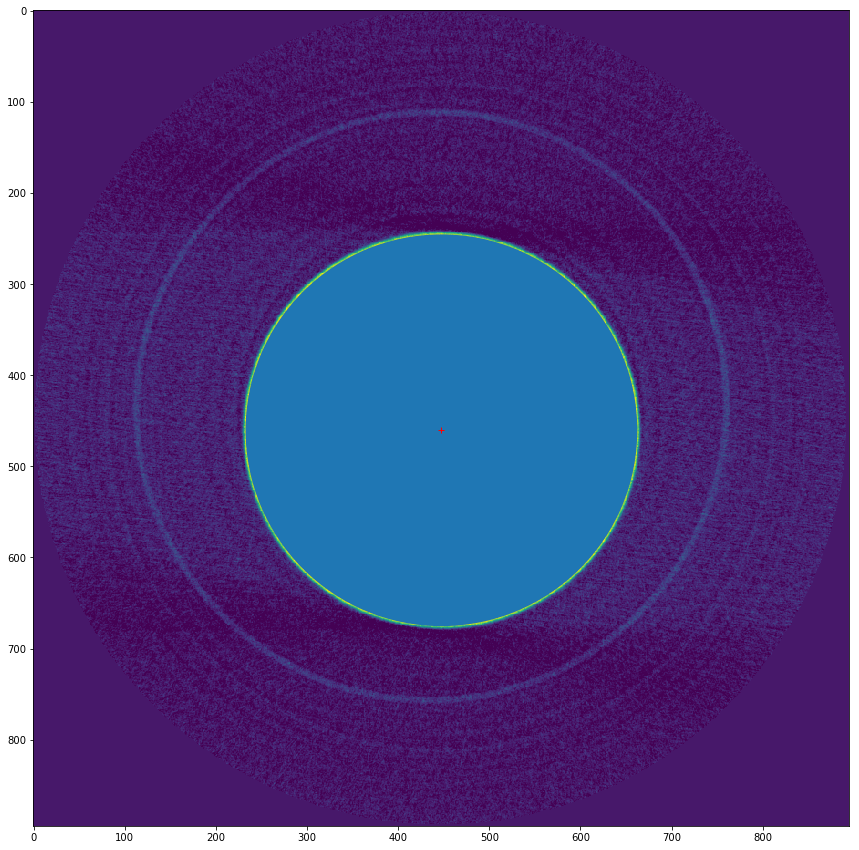

In [58]:
plt.figure(figsize=[15,15])
ax=plt.subplot(1,1,1)
plt.imshow(img)
plt.plot(cogx,cogy,'+r')
c=Circle((cogx,cogy),215)

ax.add_patch(c)